In [63]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [64]:
data = pd.read_csv('UnivBank.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(5000, 14)
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [65]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [66]:
data['ID'].unique()

array([   1,    2,    3, ..., 4998, 4999, 5000], dtype=int64)

In [67]:
data['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [68]:
data.groupby('Age').mean()

,ID,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,,,,,,,,,,,,,
23,2879.166667,-1.666667,67.250000,92785.583333,3.000000,2.510833,1.416667,71.916667,0.000000,0.166667,0.000000,0.666667,0.416667
24,2214.535714,-1.071429,74.214286,92876.107143,2.571429,2.028571,1.785714,19.714286,0.000000,0.142857,0.000000,0.642857,0.071429
25,2216.433962,-0.018868,66.981132,93445.660377,2.886792,1.796792,1.924528,60.018868,0.000000,0.113208,0.018868,0.528302,0.339623
26,2942.628205,0.961538,84.051282,93586.051282,2.692308,2.292564,1.923077,52.564103,0.166667,0.089744,0.051282,0.448718,0.230769
27,2507.516484,1.923077,80.802198,93218.461538,2.670330,1.744286,1.879121,83.219780,0.131868,0.153846,0.065934,0.571429,0.318681
28,2133.320388,2.961165,80.970874,93047.640777,2.592233,1.846019,1.757282,53.262136,0.087379,0.077670,0.038835,0.640777,0.271845
29,2409.967480,3.715447,81.056911,93226.178862,2.617886,1.939106,1.878049,61.008130,0.121951,0.024390,0.024390,0.569106,0.365854
30,2470.382353,4.860294,77.286765,92981.808824,2.507353,1.933162,1.867647,53.411765,0.125000,0.102941,0.051471,0.639706,0.264706
31,2549.240000,5.552000,70.824000,93573.248000,2.272000,1.953040,1.856000,60.752000,0.056000,0.072000,0.064000,0.624000,0.320000


In [69]:
data.groupby('Income').mean()

,ID,Age,Experience,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Income,,,,,,,,,,,,,
8,2319.217391,48.391304,23.217391,93772.347826,2.434783,0.429130,2.000000,27.130435,0.000000,0.130435,0.000000,0.521739,0.304348
9,2570.692308,46.230769,21.153846,92796.000000,2.384615,0.384615,2.115385,28.961538,0.000000,0.115385,0.000000,0.576923,0.307692
10,2582.565217,46.565217,21.565217,92425.521739,2.478261,0.481304,1.782609,26.869565,0.000000,0.086957,0.000000,0.652174,0.260870
11,2349.111111,46.074074,20.888889,93461.888889,2.111111,0.402593,1.777778,36.962963,0.000000,0.222222,0.074074,0.333333,0.481481
12,2594.500000,46.700000,22.000000,92938.166667,2.766667,0.522333,1.733333,27.833333,0.000000,0.233333,0.066667,0.500000,0.333333
13,2806.687500,43.593750,18.750000,93374.906250,2.968750,0.574063,1.812500,26.031250,0.000000,0.156250,0.093750,0.718750,0.187500
14,2530.064516,44.161290,19.161290,93264.161290,2.870968,0.558065,1.903226,42.612903,0.000000,0.064516,0.032258,0.677419,0.322581
15,2171.272727,50.090909,24.939394,93239.272727,2.515152,0.475758,2.030303,43.939394,0.000000,0.060606,0.030303,0.484848,0.151515
18,3008.358491,46.603774,21.415094,93333.452830,2.150943,0.569811,2.169811,26.188679,0.000000,0.094340,0.094340,0.622642,0.415094


In [70]:
data.groupby('Education').mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Education,,,,,,,,,,,,,
1,2473.121660,44.963740,20.065363,85.586355,93147.202767,2.236164,2.260830,61.627385,0.044370,0.106870,0.056298,0.598760,0.302004
2,2489.587313,45.039914,19.770492,64.313614,93278.676408,2.652174,1.685089,51.319316,0.129722,0.106914,0.062723,0.612972,0.285103
3,2548.931379,46.140573,20.471686,66.122585,93041.968688,2.381079,1.723391,54.178548,0.136576,0.098601,0.063957,0.578947,0.291139


In [71]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [72]:
##Dependent --> Income,CCAvg,CDAccount independent --> Personal Loan

In [73]:
##Feature Selection

In [74]:
##**Make a list of data frame column names**

In [75]:
l_column = list(data.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [76]:
X = data[l_column[0:len_feature-2]]
X.columns

Index([u'ID', u'Age', u'Experience', u'Income', u'ZIP Code', u'Family',
       u'CCAvg', u'Education', u'Mortgage', u'Personal Loan',
       u'Securities Account', u'CD Account'],
      dtype='object')

In [77]:
X=X.drop('ID',axis=1)
X.columns

Index([u'Age', u'Experience', u'Income', u'ZIP Code', u'Family', u'CCAvg',
       u'Education', u'Mortgage', u'Personal Loan', u'Securities Account',
       u'CD Account'],
      dtype='object')

In [78]:
X=X.drop('Age',axis=1)
X=X.drop('Experience',axis=1)
X=X.drop('ZIP Code',axis=1)
X=X.drop('Family',axis=1)
X=X.drop('Education',axis=1)
X=X.drop('Mortgage',axis=1)
X=X.drop('Personal Loan',axis=1)
X=X.drop('Securities Account',axis=1)

In [79]:
X.columns

Index([u'Income', u'CCAvg', u'CD Account'], dtype='object')

In [80]:
y = data[l_column[len_feature-5]]

In [81]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [82]:
##Logistic Regression

In [84]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True]
[1 1 1]


In [85]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.519120
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Sat, 13 Oct 2018   Pseudo R-squ.:                 -0.6417
Time:                        19:18:01   Log-Likelihood:                -2595.6
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Income        -0.0174      0.001    -18.062      0.000      -0.019      -0.016
CCAvg         -0.0226      0.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
y_pred = logreg.predict(X_test)

In [94]:
print('Accuracy of logistic regression classifier on Train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on Train set: 0.91


In [89]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.914


In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1342   30]
 [  74   54]]


In [95]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.98      0.96      1372
          1       0.64      0.42      0.51       128

avg / total       0.92      0.93      0.92      1500



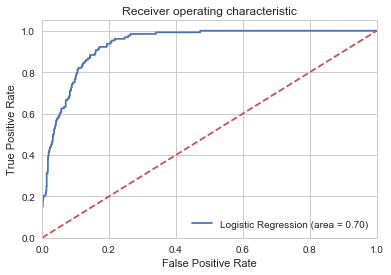

In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()